In [1]:
import numpy as np 
from typing import Dict, Any, List
# import expression_handler as eh
import yaml

from math import *

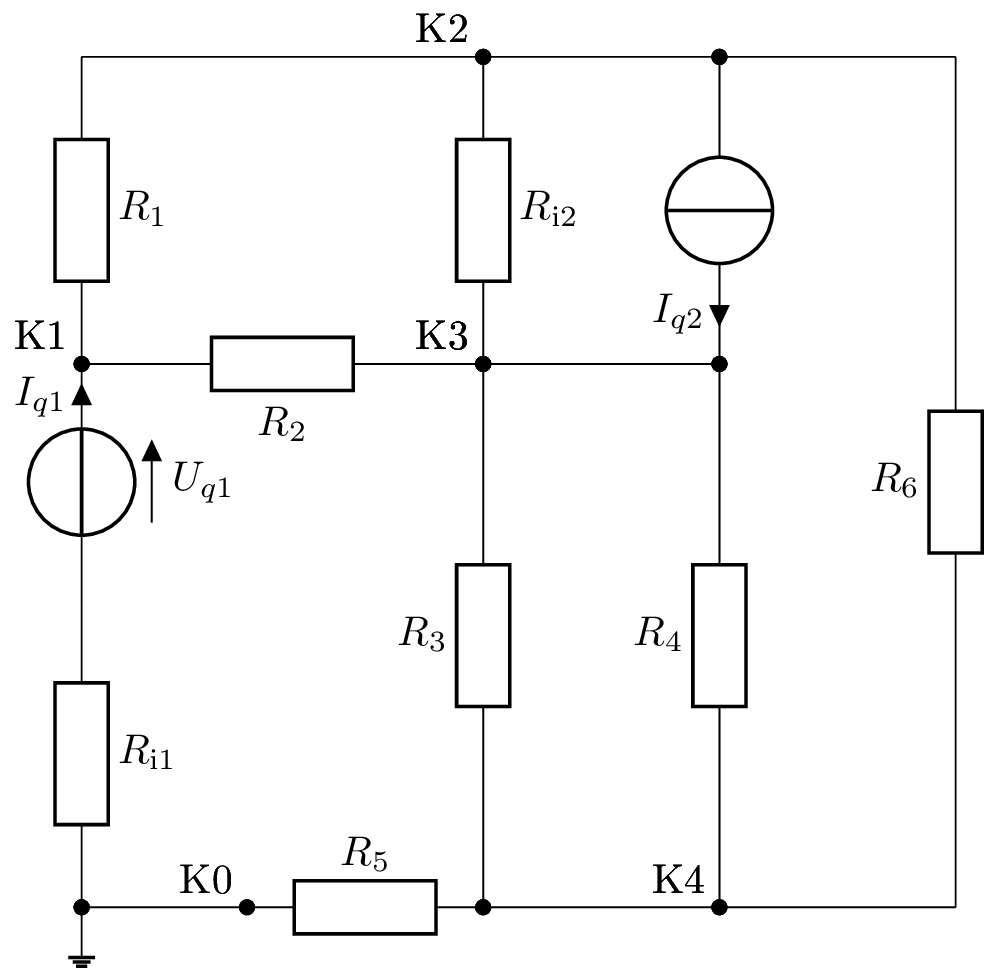

In [97]:
from lcapy import Circuit

net = Circuit("./GET-HU5/nets/schematic_2_3.net")

net.draw(style="european")

In [158]:
net.annotate_currents()

I0   K1	 0; down=1.5, i=I_{q2}, l=
R1   K1  _2; up=1.5, , i={$\frac{R_{2} \left(I_{0} R_{3} R_{5} R_{i2} + I_{0} R_{3} R_{i1} R_{i2} + I_{0} R_{4} R_{i1} R_{i2} + I_{0} R_{5} R_{i1} R_{i2} - R_{3} R_{6} V_{0} - R_{3} R_{i2} V_{0} - R_{4} R_{5} V_{0} - R_{4} R_{6} V_{0} - R_{4} R_{i2} V_{0} - R_{5} R_{6} V_{0} - R_{5} R_{i2} V_{0}\right)}{R_{1} R_{2} R_{3} R_{5} + R_{1} R_{2} R_{3} R_{6} + R_{1} R_{2} R_{3} R_{i1} + R_{1} R_{2} R_{3} R_{i2} + R_{1} R_{2} R_{4} R_{5} + R_{1} R_{2} R_{4} R_{6} + R_{1} R_{2} R_{4} R_{i1} + R_{1} R_{2} R_{4} R_{i2} + R_{1} R_{2} R_{5} R_{6} + R_{1} R_{2} R_{5} R_{i1} + R_{1} R_{2} R_{5} R_{i2} + R_{1} R_{3} R_{4} R_{5} + R_{1} R_{3} R_{4} R_{6} + R_{1} R_{3} R_{4} R_{i1} + R_{1} R_{3} R_{4} R_{i2} + R_{1} R_{3} R_{5} R_{6} + R_{1} R_{3} R_{5} R_{i2} + R_{1} R_{3} R_{6} R_{i1} + R_{1} R_{3} R_{i1} R_{i2} + R_{1} R_{4} R_{5} R_{i1} + R_{1} R_{4} R_{6} R_{i1} + R_{1} R_{4} R_{i1} R_{i2} + R_{1} R_{5} R_{6} R_{i1} + R_{1} R_{5} R_{i1} R_{i2} + R_{2} R_{3} R_{4}

In [146]:
net = net.subs({"R1": 100, "Ri1": 100, "R2": 100, "Ri2": 100, "R3": 100, "R4": 100, "I0": 1, "V0": 10})

In [27]:
import sympy

In [147]:
n = net.nodal_analysis()

In [148]:
len(n.unknowns)

In [149]:
ne = n.nodal_equations()

In [150]:
ne

⎧          V_K1(t)   V_K2(t)   V_K4(t)                V_K1(t)   V_K2(t)   V_K3
⎨K1: I₀₁ + ─────── - ─────── - ─────── + 1 = 0, K2: - ─────── + ─────── - ────
⎩             25        50       100                     50        25       10

(t)   V_K4(t)            V_K2(t)   V_K3(t)   V_K3(t)   V_K3(t) - V_K4(t)      
─── - ─────── = 0, K3: - ─────── + ─────── + ─────── + ───────────────── = 0, 
0       100                100       100        R₆             R₅             

          V_K1(t)   V_K2(t)   V_K4(t)   -V_K3(t) + V_K4(t)    ⎫
K4: I₀₁ - ─────── - ─────── + ─────── + ────────────────── = 0⎬
            100       100        50             R₅            ⎭

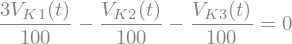

In [121]:
ne[nkeys[0]]

In [9]:
a = {"a":1, "b":2}

In [10]:
a

{'a': 1, 'b': 2}

In [11]:
a.pop("c")

KeyError: 'c'

In [8]:
a

{'b': 2}

In [112]:
nkeys = list(ne.keys())

In [72]:
from lcapy.sexpr import s

In [73]:
ns = ne(s).solve(n.unknowns)

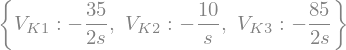

In [74]:
ns

In [79]:
f = (list(ns.values())[0])

In [76]:
f = f.simplify()

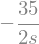

In [80]:
f

In [82]:
(f*s).evaluate()

In [296]:
type(float(sm.Float(fv.subs({'t': 0.0}))))

float

In [132]:
ne = n.nodal_equations()

In [133]:
ne

⎧    3⋅V_K1(t)   V_K2(t)   V_K3(t)                                      V_K1(t
⎨K1: ───────── - ─────── - ─────── = 0, K2: V₁(t) = V_K2(t) + 10, K3: - ──────
⎩       100        100       100                                          100 

)   V_K2(t)   3⋅V_K3(t)                                  ⎫
─ - ─────── + ───────── + 1 = 0, _1: V₁(t) = V_K2(t) + 10⎬
      100        100                                     ⎭

In [134]:
ne["K1"].latex()

'\\frac{3 V_{K1}(t)}{100} - \\frac{V_{K2}(t)}{100} - \\frac{V_{K3}(t)}{100} = 0'

In [55]:
from lcapy import symbol

In [76]:
k1 = ne["K1"].subs({"R1": 100, "R2": 100, "R3": 100, "R4": 100, "I0": 1, "V0": 10})


In [82]:
na = net.laplace().nodal_analysis()

In [84]:
na.nodal_equations()

⎧    V_K1(s) - V_K3(s)   V_K1(s)   V_K1(s) - V_K2(s)                  V₀      
⎨K1: ───────────────── + ─────── + ───────────────── = 0, K2: V₁(s) = ── + V_K
⎩            R₄             R₃             R₁                         s       

          I₀   V_K3(s)   -V_K1(s) + V_K3(s)   -V_K2(s) + V_K3(s)              
2(s), K3: ── + ─────── + ────────────────── + ────────────────── = 0, _1: V₁(s
          s      Ri₂             R₄                   R₂                      

    V₀          ⎫
) = ── + V_K2(s)⎬
    s           ⎭

In [67]:
# net1 = net.replace("V0", "W")
# net2 = net.replace("I1", " ")
net3 = net.remove("I0")

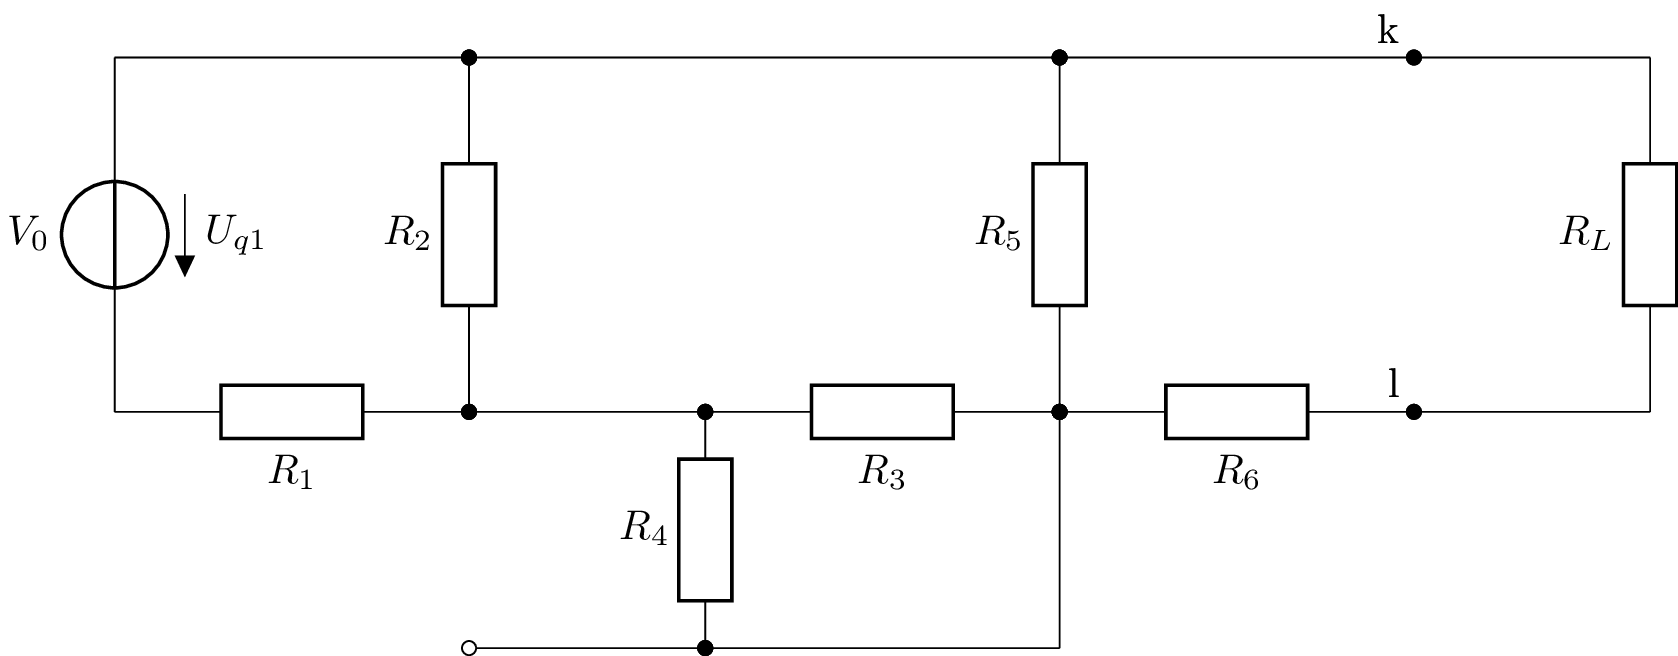

In [61]:
net3.draw(style="european")

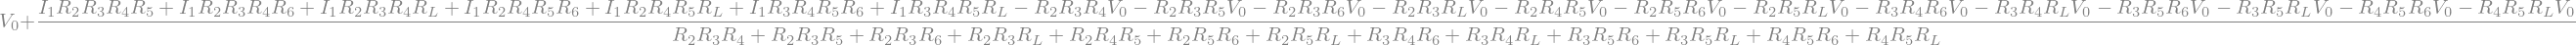

In [16]:
net.R4.V.expr["t"]

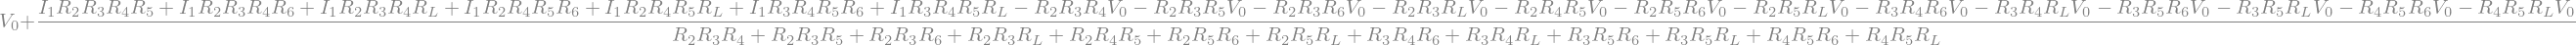

In [18]:
net.R4.V.expr["t"]

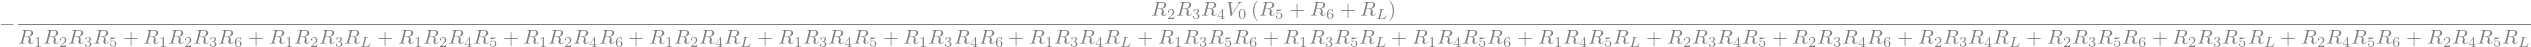

In [68]:
net.R3.V.expr["t"]

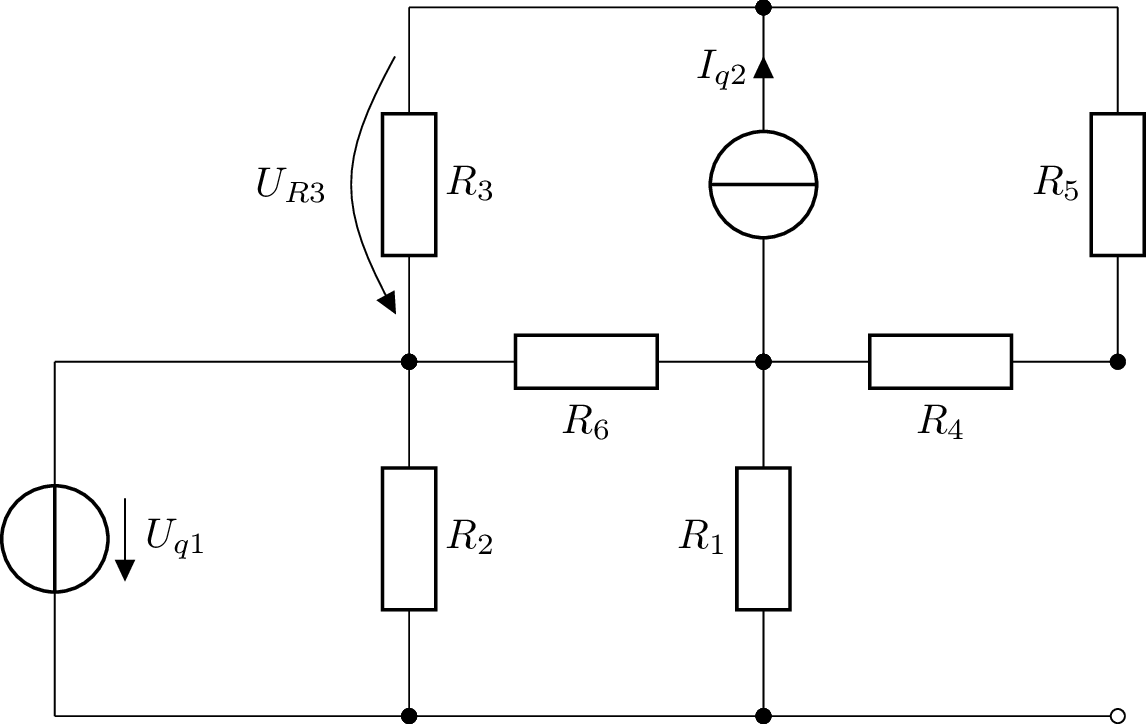

In [14]:
net.draw(style="european")

### Convert to solution netlist : 


In [73]:
netlist_str = net.netlist()

In [134]:
net_elems = netlist_str.split('\n')
net_elems_clean = []
for elem in net_elems:
    
    if elem[0] not in ['W', ';']:
        e = elem[:2]
        e = e.replace('V', 'U')
        elem = re.sub(", [i]=I_\{[^}]+\}", '', elem)
        elem = re.sub(", [v]=U_\{[^}]+\}", '', elem)
        elem += ", v=U_{" + e + "}, i=I_{" + e + "}"
    
    net_elems_clean.append(elem)

netlist_str_sol = '\n'.join(net_elems_clean)

In [135]:
print(netlist_str_sol)

V0 _0 _1; up=1.5, v=U_{U0}, i=I_{U0}
R1 _0  0; right=1.5, v=U_{R1}, i=I_{R1}
W  _1  2; right
R2  2  0; down, v=U_{R2}, i=I_{R2}
W   0  3; right
I0  0 _4; down=1.5, v=U_{I0}, i=I_{I0}
W  _4  5; right
R4  3  5; down, v=U_{R4}, i=I_{R4}
W   2  7; right
R5  7  6; down, v=U_{R5}, i=I_{R5}
R3  6  3; left=1.5, v=U_{R3}, i=I_{R3}
W   5 _8; right
W  _8  6; up
R6  6  l; right=1.5, v=U_{R6}, i=I_{R6}
W   7  k; right=1.5
W   k  _9; right
W   l  _10; right
RL  _9  _10; down, v=U_{RL}, i=I_{RL}
; label_nodes=alpha, label_values=false


In [108]:
import re

# re.findall("[i,v]=[I,U]_\{[^}]+\}", net_elems[0])
re.sub(", [i]=I_\{[^}]+\}", "", net_elems[0])
re.sub(", [v]=U_\{[^}]+\}", '', net_elems[0])

# net_elems[5]

'V0 _0 _1; up=1.5'

### Generate random networks : 

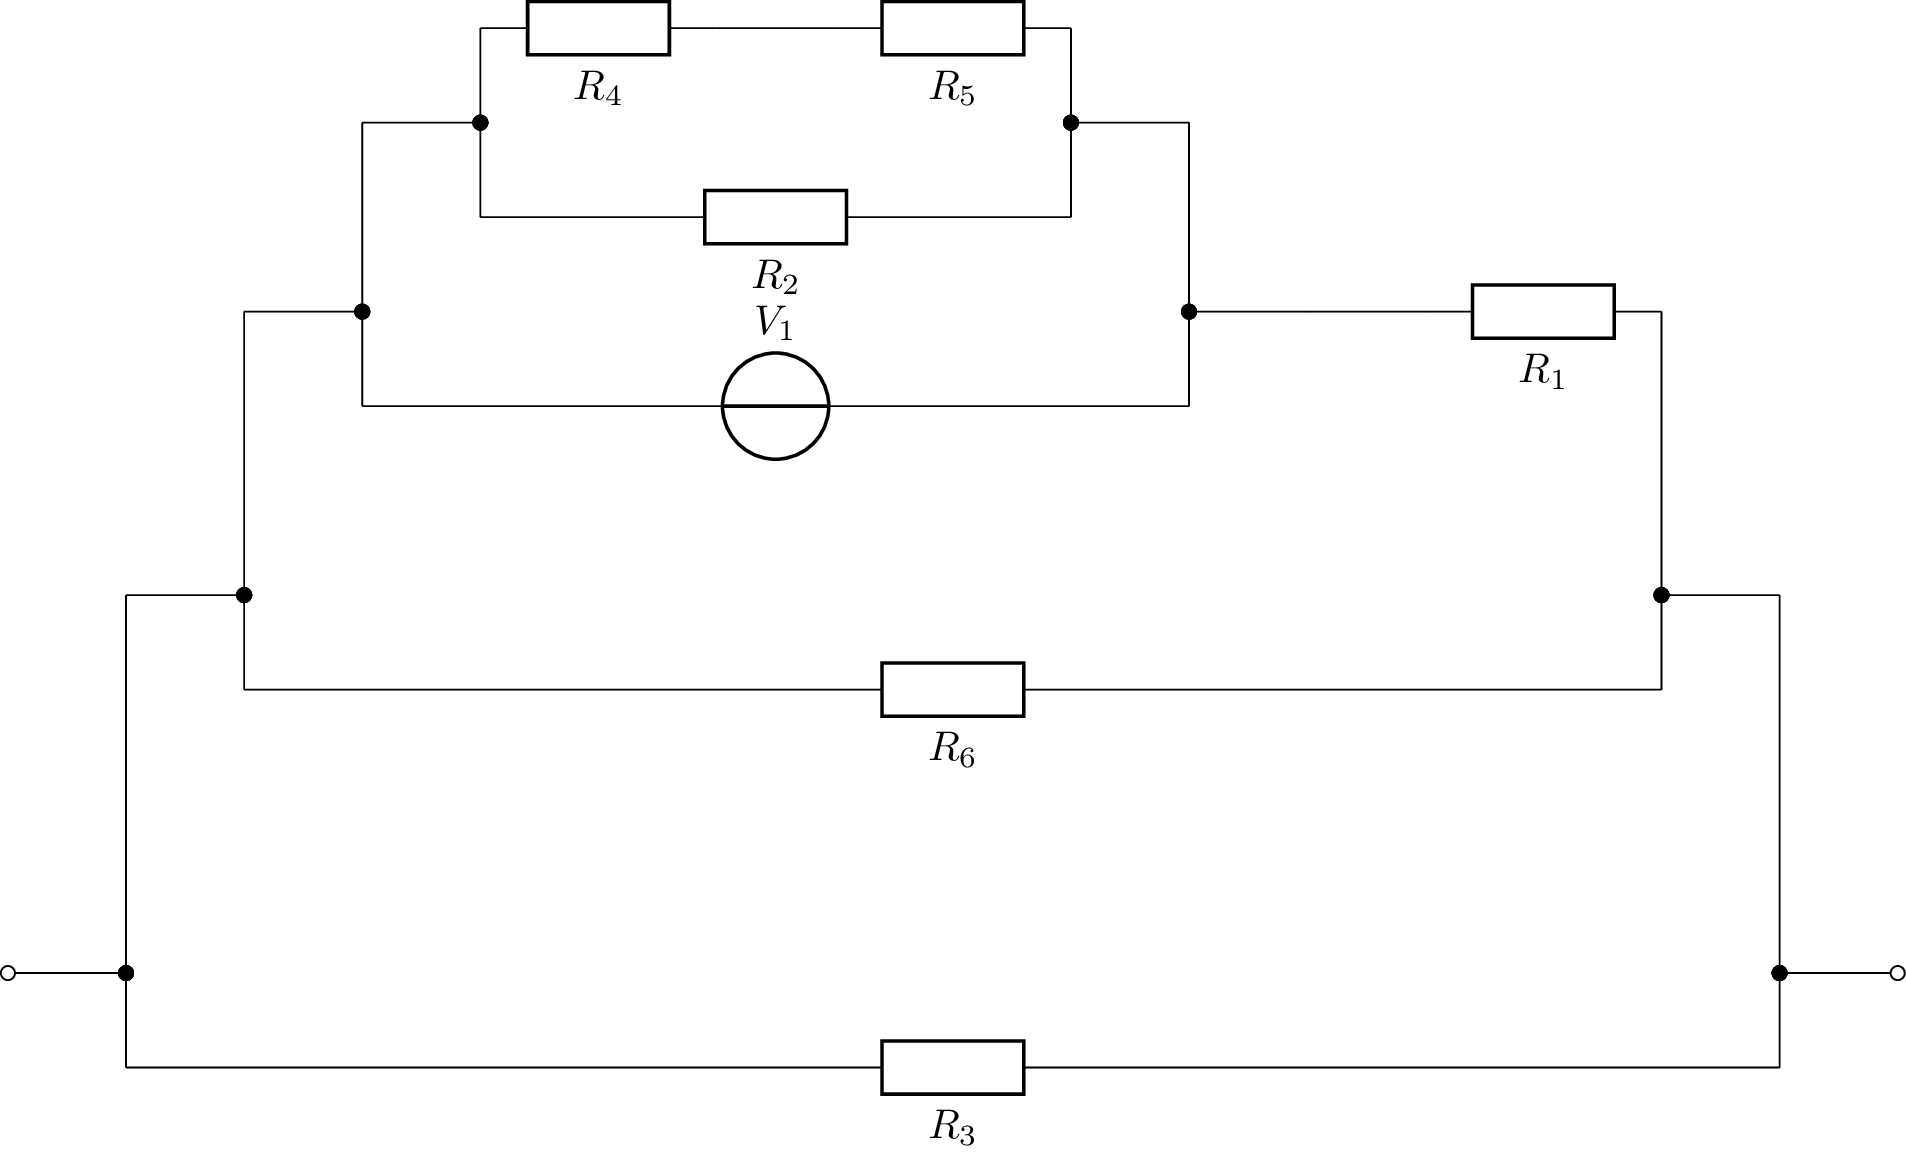

In [137]:
import lcapy

net = lcapy.random_network(num_resistors=6, 
                           num_capacitors=0, 
                           num_inductors=0, 
                           num_voltage_sources=1, 
                           kind='dc',
                           num_parallel=4,)

# generate netlist string : 
netlist = net.netlist()

net.draw(style="european")

### Thevenin and norton equivalents : 

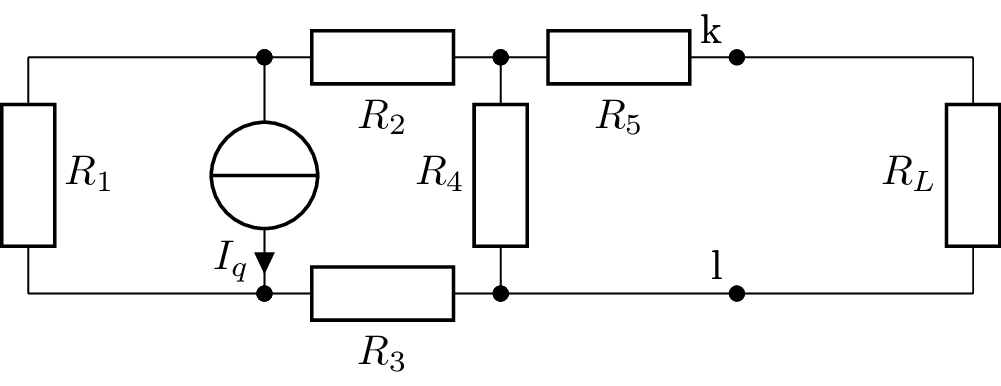

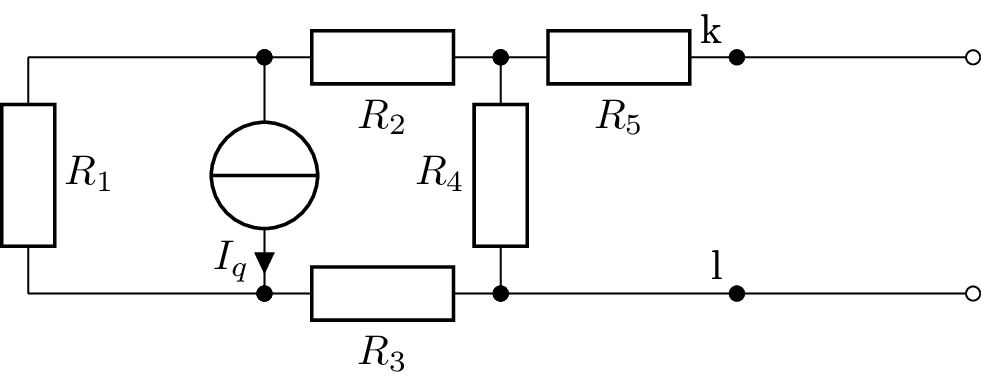

In [14]:
from lcapy import Circuit

net_full = Circuit("./GETUE-HU3/schematic_2_1.net")
net = net_full.copy()
net = net.remove("RL")

net_full.draw(style="european")
net.draw(style="european")

In [15]:
net_th = net.thevenin('k', 'l')

In [16]:
net_th = net_th.circuit()

In [17]:
net_th.elements.keys()

odict_keys(['V1', 'W1', 'Z1'])

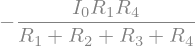

In [21]:
net_th.V1.V.expr['dc']

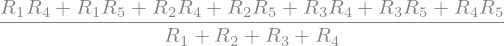

In [22]:
net_th.Z1.R.expr

In [172]:
net_norton = net.norton('k', 'l')

In [173]:
net_norton = net_norton.circuit()

In [174]:
net_norton.elements.keys()

odict_keys(['W1', 'W2', 'W3', 'I1', 'W4', 'W5', 'Y1', 'W6'])

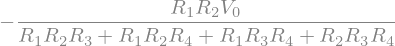

In [193]:
net_norton.I1.I.expr["dc"]

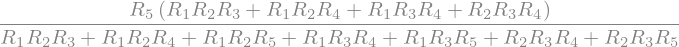

In [190]:
net_norton.Y1.R.expr

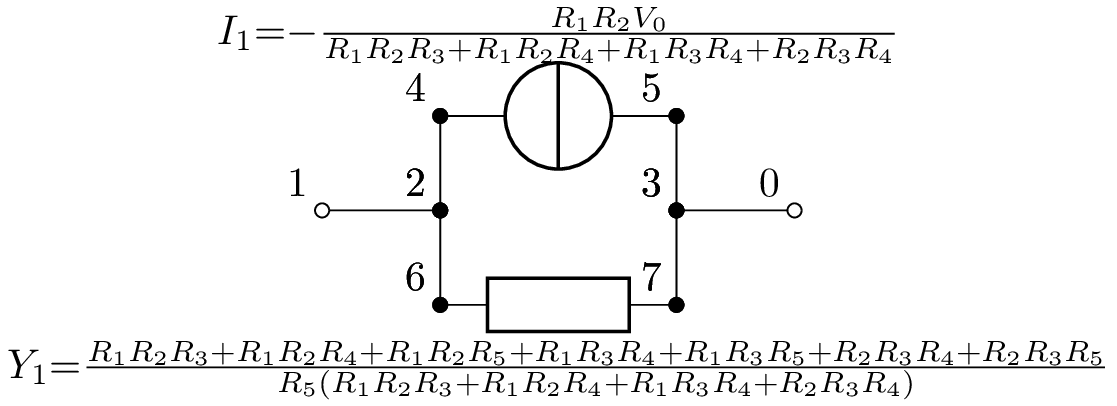

In [177]:
net_norton.draw(style="european")

In [133]:
bnort_net = b_norton.network()

In [143]:
subsdict = {"R1": 100, "R2": 100, "R3": 100, "R4": 100, "R5": 100, "V0":10, "RL": 100}

In [144]:
b_norton_sub = b_norton.subs(subsdict)

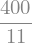

In [145]:
b_norton_sub.Z

In [124]:
b_norton.Isc # current source equation

                -R₁⋅R₂⋅V₀                
─────────────────────────────────────────
R₁⋅R₂⋅R₃ + R₁⋅R₂⋅R₄ + R₁⋅R₃⋅R₄ + R₂⋅R₃⋅R₄

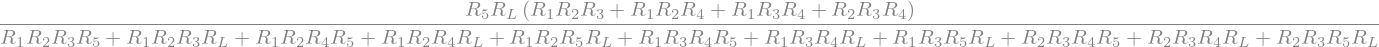

In [125]:
b_norton.R # internal resistance 

### Create thevenin or norton equivalent circuit from generated circuit : 

In [11]:
net_norton = net.norton()
net_thevenin = net.thevenin()

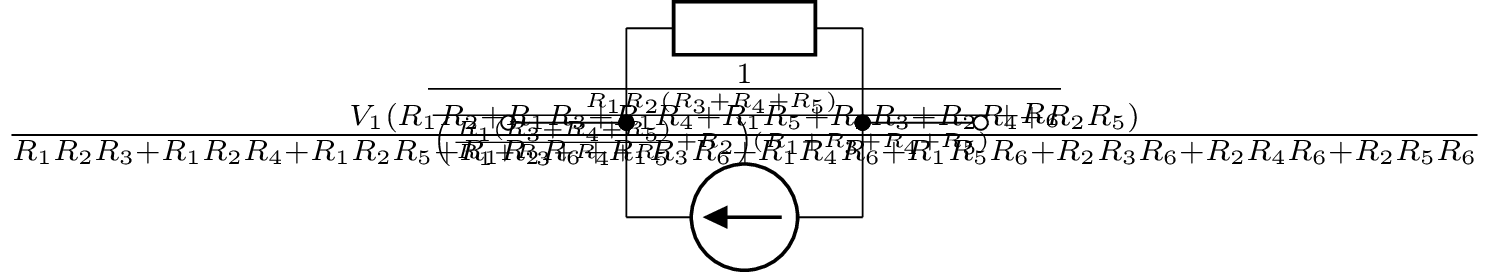

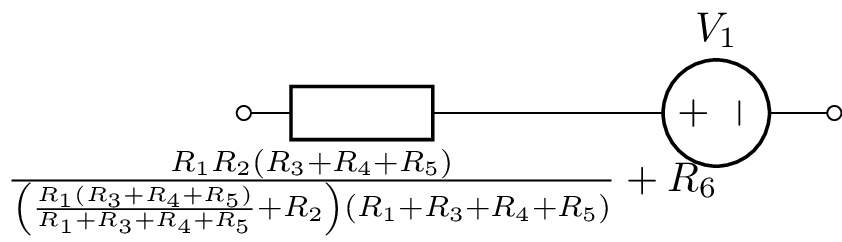

In [12]:
# generate netlist string : 
# netlist = net_norton.netlist()

net_norton.draw()

net_thevenin.draw()

In [16]:
net_thevenin.netlist()

'Z1 1 2 {R1*R2*(R3 + R4 + R5)/((R1*(R3 + R4 + R5)/(R1 + R3 + R4 + R5) + R2)*(R1 + R3 + R4 + R5)) + R6}; right\nW 2 3; right=0.5\nV1 3 0 V1; right'

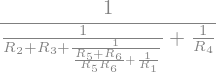

In [5]:
net_norton.R